# 데이터 처리 심화

### 주요 내용

1. 변수 수정, 추가 및 제거
2. 변수 형식 변환
3. 결측값 처리 및 파생변수 생성

<br>

### 목표 
1. 분석 목적에 맞게 변수를 수정하고 파생 변수를 추가할 수 있다.
2. 날짜 등 변수 형식을 활용할 수 있다.
3. 결측값을 적절한 값으로 대체하는 방법을 확인한다.


<br>
<hr>
<br>

<br>

## 1. 변수(열)의 수정, 추가, 제거

**pandas**의 기본 기능과 메서드를 활용하여 변수를 추가 하거나 수정, 업데이트하거나 제거 가능  
변수를 선택하듯 **=** 을 활용해서 변수를 추가하거나 업데이트 가능

### 1.1. 변수 수정 및 추가

In [ ]:
# 라이브러리 불러오기
import pandas as pd


# 예제 만들기 : 딕셔너리를 활용한 DataFrame 생성
df_own = pd.DataFrame(
                      {'FIRST' : ['A', 'B', 'C', 'D'],
                       'SECOND': [7,6,5,8], 
                       'THIRD' : pd.date_range('2023-01-01', periods=4, freq='W-SAT')}
                     )
df_own

In [ ]:
# 변수이름을 활용한 변수선택
df_own['SECOND']

In [ ]:
# =을 활용한 추가
df_own['FOURTH'] = 0
df_own

In [ ]:
# =을 활용한 업데이트
df_own['FOURTH'] = df_own['SECOND'] + 1
df_own

<br>

### 1.2. 객체 메서드와 Series 메서드의 비교

특히 날짜시간 변수의 경우 월, 일, 요일, 시간 등 다양한 요소를 추출해서 변수로 추가할 수 있음  
Python은 개발언어로 객체의 형식에 매우 엄격하므로 메서드의 구분 필요  
개별 날짜에 적용할 수 있는 메서드가 아닌 **pandas**의 **Series** 메서드 활용을 추천 

In [ ]:
# []와 for를 활용한 파생변수 생성
df_own.loc[0, 'THIRD'].weekday()
    ## 0~6: 월~일
    ## 5: 토
    
    ## 하나의 값에 대해서는 메서드 활용가능

In [ ]:
# Series에 대해서는 Series의 메서드만 활용 가능
df_own['THIRD'].weekday()

In [ ]:
df_own['THIRD'].apply(lambda x: x.weekday())
# df_own

<br>

pandas의 *dt.weekday*를 활용하면 훨씬 손쉽게 파생변수 생성 가능
 * 참고: [dt.weekday](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html)

In [ ]:
# pandas의 dt.weekday 활용
df_own['THIRD'].dt.weekday

In [ ]:
df_own['WEEKDAY'] = df_own['THIRD'].dt.weekday

In [ ]:
df_own

<br>

### 1.3. 조건을 활용한 값 변경, 생성

조건을 활용해 일부 관측치를 선택하듯이, 조건을 설정하고 변수를 추가하거나 업데이트 가능

In [ ]:
# 조건을 활용한 일부 관측치 선택
df_own.loc[df_own['FIRST'].isin(['A','B'])]

In [ ]:
# 조건을 활용한 일부 관측치의 특정 변수 값 변경
df_own.loc[df_own['FIRST'].isin(['A','B']), 'FOURTH']

In [ ]:
df_own.loc[df_own['FIRST'].isin(['A','B']), 'FOURTH'] = 9999

In [ ]:
df_own

In [ ]:
# 일부 관측치만 값 생성
df_own.loc[df_own['FIRST'].isin(['A','B']), 'OPTIONAL'] = 1
df_own
    ## NaN := 결측값(missing)

<br>

### 1.4. 변수 제거

*drop()* 은 관측치와 변수를 제거할 수 있는데 **index**와 **columns**를 활용  
`axis=`옵션에 따라 `axis=0`이면 관측치를 제거하거 `axis=1`이면 변수를 제거  

`columns=`이라는 옵션을 명시해서 변수를 제거하는 것이 가장 명확하고 실수를 줄일 수 있음

In [ ]:
# drop()을 활용한 관측치/변수 제거
df_own.drop('FOURTH', axis=1)
    # axis = 0 : 관측치
    # axis = 1 : 변수

In [ ]:
# drop()을 활용한 관측치/변수 제거(columns 활용)
df_own.drop(columns=['FOURTH'])

In [ ]:
# drop( ) 실행 후 원본 데이터는 변함이 없음
df_own

In [ ]:
# 원본 데이터의 업데이트
df_own = df_own.drop(columns=['FOURTH'])
df_own

<br>

### 1.5. 변수 이름 변경

변수이름을 바꾸고 싶을 때는 **DataFrame**의 메서드 *rename()* 을 활용  
이때 `columns=` 옵션을 활용하고 딕셔너리 형식으로 기존변수이름과 새변수이름을 콜론으로 연결

In [ ]:
# rename() 활용 변수 이름 바꾸기 
df_own.rename(columns = {'FIRST':'var1', 'SECOND':'var2'})

<br>

#### [실습] df_sp를 활용

1. 'math score', 'reading score', 'writing score'를 합한 변수 'total'을 **df_sp**에 추가
2. 1의 'total'이 270이상인 학생들만 'EX'라는 값을 갖는 'grade' 변수 추가
3. 'math score', 'reading score', 'writing score' 중 한과목이라도 40보다 작은지 확인하기
4. 3.의 결과를 활용해서 세 점수 중 하나라도 40점 미만은 학생은 'grade'를 'FAIL'로 수정하기
5. 변수 'grade'의 이름을 'class'로 바꾸기
6. 변수 'total'을 제거하기



In [ ]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')
df_sp.head()

In [ ]:
df_sp['math score'].sum()

In [ ]:
df_sp.filter(regex='score').sum(axis=1)

In [ ]:
# 1. 답안
df_sp['total'] = df_sp['math score'] + df_sp['reading score'] + df_sp['writing score']
df_sp

In [ ]:
df_sp.loc[df_sp['total'] >= 270, 'grade'] = 'EX'
df_sp

In [ ]:
(df_sp.filter(regex='score') < 40).sum(axis=0)

In [ ]:
(df_sp.filter(regex='score') < 40).any(axis=1)

In [ ]:
# 3. 답안
cond_fail = (df_sp['math score']<40) | (df_sp['reading score']<40) | (df_sp['writing score']<40)
cond_fail

In [ ]:
df_sp.loc[cond_fail, 'grade'] = 'FAIL'

In [ ]:
df_sp.rename(columns={'grade':'class'})

In [ ]:
df_sp.drop(columns=['total'])

<br>
<hr>
<br>

## 2. 결측값 처리

결측값은 다양한 이유로 발생
- 애초에 값이 없는 경우
- 값이 있으나 사람 실수로 누락한 경우
- 센서, 통신망 등의 오류로 값이 들어오지 않은 경우

먼저 결측값 존재 여부 확인하고, 대체를 할 지 그대로 둘 지를 결정  
대체를 한다면 어떤 값으로 채울지도 고민하여 지정

In [ ]:
# 예제 데이터 불러오기
df_na = pd.read_csv('./data/data_dupna.csv')
df_na
    # NaN : 결측

<br>

> 아래의 명령어를 활용하면 전체 데이터에서 결측값이 있는 관측치나 변수를 확인할 수 있습니다. 


In [ ]:
# 하나라도 결측값이 있는 변수 확인
df_na.isnull().any(axis=1)

In [ ]:
# 하나라도 결측값이 있는 관측치 확인
df_na[df_na.isnull().any(axis=1)]

<br>

### 2.1. 결측값 포함 관측치 제거

결측값이 있는 관측치에 대응하는 가장 간단한 방법은 결측치를 포함한 변수나 관측치를 제거하는 것

In [ ]:
# 하나라도 결측값이 있는 관측치 제거
df_na.dropna()

In [ ]:
# 특정 변수 기준 결측값이 있는 관측치 제거
df_na.dropna(subset=['info1'])

<br>

### 2.2. 결측값 대체

일반적으로 결측값을 그대로 두거나 다음과 같이 결측값을 적절한 값으로 대체하고 활용

In [ ]:
# 모든 결측값을 일괄 대체
df_na.fillna(value=0)

In [ ]:
# 변수별 결측값 대체 지정
df_na.fillna(value={'info1':0, 'info2':'NA'})

In [ ]:
# 가장 앞쪽의 결측이 아닌 값으로 대체
    ## 센서 등의 값 누락에 활용
df_na.fillna(method='bfill')

In [ ]:
df_na

In [ ]:
# 이후 값중 결측이 아닌 값으로 대체
    ## groupby()를 활용하여 id 등 범위 내 대체
df_fill = df_na.groupby('id').fillna(method='bfill')
df_fill['id'] = df_na['id']
df_fill

In [ ]:
# 특정한 변수만 결측값 대체
    ## groupby()와 fillna()를 활용할 경우 그룹변수가 사라짐
    ## 특정 변수만 선택해서 결측값 대체하고 업데이트
df_na['info2'] = df_na.groupby('id')['info2'].fillna(method='ffill')    
df_na

<br>
<hr>
<br>

## 3. 변수 형식 변환 및 파생변수 생성

*read_csv()* 로 데이터를 불러오면 적당한 형식으로 지정되는데, 가끔 형식을 직접 바꿔야할 상황이 있음  
상황에 따라 날짜에서 요일을 추출하듯이 기존 변수를 활용해서 새로운 변수를 추가해서 분석에 활용해야하는 경우도 있음  

<br>

### 3.1. 변수 형식의 확인/변환
**DataFrame**에서는 다음과 같은 Series 형식을 활용

+ float: 실수(소수점을 포함한 숫자)
+ int: 정수(integer)
+ datetime: 날짜시간
+ bool: 불/불린(True 혹은 False)
+ category: 범주형
+ object: 문자형(string) 혹은 그 외

*.dtypes* 를 활용하면 변수 형식을 확인 가능  
*.astype()* 을 활용해서 변수 형식을 변환 가능



In [68]:
# 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
# 변수 형식 확인
df_ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [70]:
# children을 float으로 변환
df_ins['children'].astype('float')

0       0.0
1       1.0
2       3.0
3       0.0
4       0.0
       ... 
1333    3.0
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Name: children, Length: 1338, dtype: float64

In [71]:
# children을 object로 변환
df_ins['children'].astype('object')

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: object

In [72]:
# 기존 변수의 형식 업데이트
df_ins['children'] = df_ins['children'].astype('float')
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [73]:
# 복수 변수의 형식 일괄 업데이트
category_vars = ['sex', 'smoker', 'region']
df_ins[category_vars] = df_ins[category_vars].astype('category')
df_ins.dtypes

age            int64
sex         category
bmi          float64
children     float64
smoker      category
region      category
charges      float64
dtype: object

In [74]:
# select_dtypes()의 활용
df_ins.select_dtypes('category')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


<br>

#### [실습] df_pr의 활용

1. Pulse2(뛴 후)와 Pulse1(뛰기 전)의 차이를 계산하고 'Diff'로 변수 추가하기
2. `df_pr.dtypes`로 형식 확인하고 `df_pr.nunique()`로 중복값 제거한 값 개수 확인하기
3. 범주형 형식이 적당한 변수 이름 목록 만들기
4. 3.의 변수들을 astype()으로 category 형식으로 변환하고 업데이트 하기
5. Ran, Smokes, Alcohol별 1.의 Diff의 평균 계산하기

In [83]:
df_pr = pd.read_csv('data/PulseRates.csv')
df_pr.head(1)

,Height,Weight,Age,Gender,Smokes,Alcohol,Exercise,Ran,Pulse1,Pulse2,Year
0,173,57.0,18,2,2,1,2,2,86.0,88.0,93


In [84]:
df_pr['Diff'] = df_pr['Pulse2'] - df_pr['Pulse1']
df_pr

,Height,Weight,Age,Gender,Smokes,Alcohol,Exercise,Ran,Pulse1,Pulse2,Year,Diff
0,173,57.0,18,2,2,1,2,2,86.0,88.0,93,2.0
1,179,58.0,19,2,2,1,2,1,82.0,150.0,93,68.0
2,167,62.0,18,2,2,1,1,1,96.0,176.0,93,80.0
3,195,84.0,18,1,2,1,1,2,71.0,73.0,93,2.0
4,173,64.0,18,2,2,1,3,2,90.0,88.0,93,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
105,93,27.0,19,2,2,2,3,2,119.0,120.0,98,1.0
106,161,43.0,19,2,2,2,3,2,90.0,89.0,98,-1.0
107,182,60.0,22,1,2,1,3,2,86.0,84.0,98,-2.0
108,170,65.0,18,1,2,1,1,2,69.0,64.0,98,-5.0


In [85]:
df_pr.dtypes

Height        int64
Weight      float64
Age           int64
Gender        int64
Smokes        int64
Alcohol       int64
Exercise      int64
Ran           int64
Pulse1      float64
Pulse2      float64
Year          int64
Diff        float64
dtype: object

In [78]:
df_pr.nunique()

Height      41
Weight      51
Age         13
Gender       2
Smokes       2
Alcohol      2
Exercise     3
Ran          2
Pulse1      38
Pulse2      54
Year         5
Diff        53
dtype: int64

In [79]:
cat_vars = ['Gender', 'Smokes', 'Alcohol', 'Exercise', 'Ran']
df_pr[cat_vars] = df_pr[cat_vars].astype('category')
df_pr.dtypes

Height         int64
Weight       float64
Age            int64
Gender      category
Smokes      category
Alcohol     category
Exercise    category
Ran         category
Pulse1       float64
Pulse2       float64
Year           int64
Diff         float64
dtype: object

In [86]:
df_pr.groupby(['Ran', 'Smokes', 'Alcohol'], as_index=False)['Diff'].mean()

,Ran,Smokes,Alcohol,Diff
0,1,1,1,47.666667
1,1,2,1,50.642857
2,1,2,2,53.533333
3,2,1,1,-2.500000
4,2,1,2,-1.000000
5,2,2,1,-0.666667
6,2,2,2,-1.040000


<br>

### 3.2. 수치형 변수의 구간화

수치형 변수는 그대로 활용하기 보다는 구간화하는 경우가 많음  
*cut()* 이나 *qcut()* 함수를 주로 활용

+ *cut()*: 등간격 혹은 주어진 구간 경계로 구간화
+ *qcut()*: 등비율로 구간화

In [92]:
(df_ins['age'] // 10).apply(lambda x: str(x)+'0대').astype('category')

0       10대
1       10대
2       20대
3       30대
4       30대
       ... 
1333    50대
1334    10대
1335    10대
1336    20대
1337    60대
Name: age, Length: 1338, dtype: category
Categories (6, object): ['10대', '20대', '30대', '40대', '50대', '60대']

In [89]:
# 연령대 변수 생성
    ## //: 몫 계산
    ## %: 나머지 계산
df_ins['age_grp'] = (df_ins['age'] // 10).astype('category')
df_ins

,age,sex,bmi,children,smoker,region,charges,age_grp
0,19,female,27.900,0.0,yes,southwest,16884.92400,1
1,18,male,33.770,1.0,no,southeast,1725.55230,1
2,28,male,33.000,3.0,no,southeast,4449.46200,2
3,33,male,22.705,0.0,no,northwest,21984.47061,3
4,32,male,28.880,0.0,no,northwest,3866.85520,3
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830,5
1334,18,female,31.920,0.0,no,northeast,2205.98080,1
1335,18,female,36.850,0.0,no,southeast,1629.83350,1
1336,21,female,25.800,0.0,no,southwest,2007.94500,2


In [91]:
df_ins['age_grp'] = (df_ins['age'] // 10).apply(lambda x: str(x)+'0대')
df_ins

,age,sex,bmi,children,smoker,region,charges,age_grp
0,19,female,27.900,0.0,yes,southwest,16884.92400,10대
1,18,male,33.770,1.0,no,southeast,1725.55230,10대
2,28,male,33.000,3.0,no,southeast,4449.46200,20대
3,33,male,22.705,0.0,no,northwest,21984.47061,30대
4,32,male,28.880,0.0,no,northwest,3866.85520,30대
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830,50대
1334,18,female,31.920,0.0,no,northeast,2205.98080,10대
1335,18,female,36.850,0.0,no,southeast,1629.83350,10대
1336,21,female,25.800,0.0,no,southwest,2007.94500,20대


<br>

*cut()* 을 활용해서 등간격으로 구간화할 수 있고, `bins=` 옵션에 적절한 구간값을 직접 넣을 수도 있음

In [93]:
# 등간격으로 구간화하기
pd.cut(df_ins['charges'], bins=10)

0        (13651.585, 19916.44]
1         (1059.225, 7386.729]
2         (1059.225, 7386.729]
3        (19916.44, 26181.296]
4         (1059.225, 7386.729]
                 ...          
1333     (7386.729, 13651.585]
1334      (1059.225, 7386.729]
1335      (1059.225, 7386.729]
1336      (1059.225, 7386.729]
1337    (26181.296, 32446.151]
Name: charges, Length: 1338, dtype: category
Categories (10, interval[float64, right]): [(1059.225, 7386.729] < (7386.729, 13651.585] < (13651.585, 19916.44] < (19916.44, 26181.296] ... (38711.006, 44975.862] < (44975.862, 51240.717] < (51240.717, 57505.573] < (57505.573, 63770.428]]

In [94]:
charges_breaks = [0, 5000, 10000, 20000, 100000000]

In [98]:
pd.cut(df_ins['charges'], bins=charges_breaks, right=False, labels=['1','2','3','4'])

0       3
1       1
2       1
3       4
4       1
       ..
1333    3
1334    1
1335    1
1336    1
1337    4
Name: charges, Length: 1338, dtype: category
Categories (4, object): ['1' < '2' < '3' < '4']

In [99]:
# cut()을 활용한 10등급화
df_ins['charges_grp'] = pd.cut(df_ins['charges'], bins=10, labels=range(10))
df_ins

,age,sex,bmi,children,smoker,region,charges,age_grp,charges_grp
0,19,female,27.900,0.0,yes,southwest,16884.92400,10대,2
1,18,male,33.770,1.0,no,southeast,1725.55230,10대,0
2,28,male,33.000,3.0,no,southeast,4449.46200,20대,0
3,33,male,22.705,0.0,no,northwest,21984.47061,30대,3
4,32,male,28.880,0.0,no,northwest,3866.85520,30대,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830,50대,1
1334,18,female,31.920,0.0,no,northeast,2205.98080,10대,0
1335,18,female,36.850,0.0,no,southeast,1629.83350,10대,0
1336,21,female,25.800,0.0,no,southwest,2007.94500,20대,0


In [100]:
# 등구간의 관측치 불균형 문제
df_ins['charges_grp'].value_counts()

0    536
1    398
2    129
3     86
5     59
6     57
4     35
7     32
9      4
8      2
Name: charges_grp, dtype: int64

In [101]:
# qcut()을 활용한 등비율 구간화
df_ins['charges_grp2'] = pd.qcut(df_ins['charges'], q=10, labels=range(1, 11))
df_ins

,age,sex,bmi,children,smoker,region,charges,age_grp,charges_grp,charges_grp2
0,19,female,27.900,0.0,yes,southwest,16884.92400,10대,2,8
1,18,male,33.770,1.0,no,southeast,1725.55230,10대,0,1
2,28,male,33.000,3.0,no,southeast,4449.46200,20대,0,3
3,33,male,22.705,0.0,no,northwest,21984.47061,30대,3,9
4,32,male,28.880,0.0,no,northwest,3866.85520,30대,0,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830,50대,1,6
1334,18,female,31.920,0.0,no,northeast,2205.98080,10대,0,1
1335,18,female,36.850,0.0,no,southeast,1629.83350,10대,0,1
1336,21,female,25.800,0.0,no,southwest,2007.94500,20대,0,1


In [102]:
df_ins['charges_grp2'].value_counts()

1     134
2     134
3     134
5     134
6     134
8     134
9     134
10    134
4     133
7     133
Name: charges_grp2, dtype: int64

<br>

#### [실습] 데이터 df_sp 활용

1. cut()으로 'reading score'를 20점 단위로 5개 그룹 변수 추가 
2. cut()으로 'reading score'를 등간격(구간 길이가 동일)으로 5개 그룹 변수 추가
3. qcut()으로 'readiong score'를 등비율로 5 등급화
4. pivot_table()을 활용해서 'parental level of education'과 3.의 그룹 변수로 'math score'의 평균 계산

In [ ]:
df_sp.head()

In [106]:
df_sp['r_grp'] = pd.cut(df_sp['reading score'], bins=[0,20,40,60,80,100], labels=[1,2,3,4,5])
df_sp['r_grp']

0      4
1      5
2      5
3      3
4      4
      ..
995    5
996    3
997    4
998    4
999    5
Name: r_grp, Length: 1000, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [107]:
pd.cut(df_sp['reading score'], bins=5)

0       (66.8, 83.4]
1      (83.4, 100.0]
2      (83.4, 100.0]
3       (50.2, 66.8]
4       (66.8, 83.4]
           ...      
995    (83.4, 100.0]
996     (50.2, 66.8]
997     (66.8, 83.4]
998     (66.8, 83.4]
999    (83.4, 100.0]
Name: reading score, Length: 1000, dtype: category
Categories (5, interval[float64, right]): [(16.917, 33.6] < (33.6, 50.2] < (50.2, 66.8] < (66.8, 83.4] < (83.4, 100.0]]

In [109]:
df_sp['r_grp'] = pd.qcut(df_sp['reading score'], q=5)
df_sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,grade,r_grp
0,female,group B,bachelor's degree,standard,none,72,72,74,218,NaN,"(66.0, 74.0]"
1,female,group C,some college,standard,completed,69,90,88,247,NaN,"(82.0, 100.0]"
2,female,group B,master's degree,standard,none,90,95,93,278,EX,"(82.0, 100.0]"
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,NaN,"(16.999, 57.0]"
4,male,group C,some college,standard,none,76,78,75,229,NaN,"(74.0, 82.0]"
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,EX,"(82.0, 100.0]"
996,male,group C,high school,free/reduced,none,62,55,55,172,NaN,"(16.999, 57.0]"
997,female,group C,high school,free/reduced,completed,59,71,65,195,NaN,"(66.0, 74.0]"
998,female,group D,some college,standard,completed,68,78,77,223,NaN,"(74.0, 82.0]"


<Axes: xlabel='r_grp', ylabel='parental level of education'>

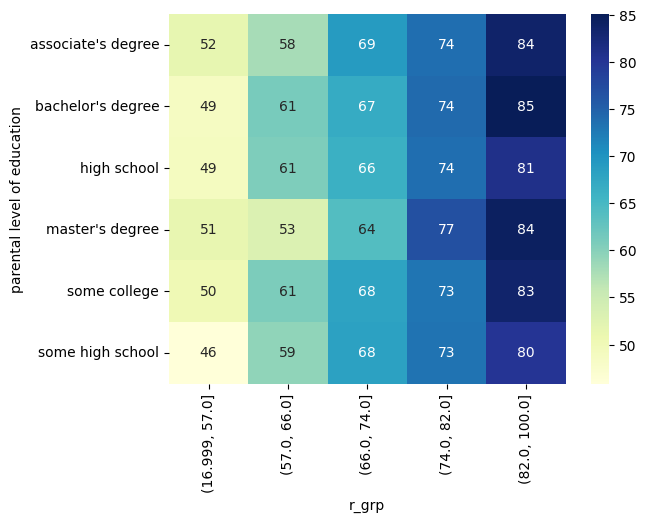

In [112]:
import seaborn as sns

pt = df_sp.pivot_table(values='math score', index='parental level of education', columns='r_grp', aggfunc='mean')
sns.heatmap(pt, cmap='YlGnBu', annot=True)

### 3.3. 그룹 내 순위, 이동, 누적 변수 생성

> 데이터 분석 과정에서 그룹별로 순위를 매기거나, 직전 값과 비교를 통해서 변화량 등을 확인하기도 합니다. 뿐만 아니라 이동 평균이나 누적 최댓값 등을 계산하기도 합니다.

In [113]:
# 데이터 불러오기
df_dup = pd.read_csv('data/data_dupna.csv')
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3
0,101,A,2022-01-03,20.0,FC,C887,N,NaN
1,101,C,2022-05-03,120.0,FC,C887,NaN,NaN
2,101,B,2022-04-12,32.0,FC,C887,NaN,N
3,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN
4,103,B,2022-03-02,25.0,FC,C453,NaN,N
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N


In [114]:
# 순위 생성(동점일 경우 평균 등수)
df_dup['amount'].rank(ascending=False)

0    6.0
1    1.0
2    3.0
3    NaN
4    5.0
5    2.0
6    4.0
7    8.0
8    7.0
Name: amount, dtype: float64

In [ ]:
ValueError: first not supported for non-numeric data

In [119]:
df_dup.dtypes

id              int64
product_cd     object
date           object
amount        float64
channel        object
info1          object
info2          object
info3          object
seq           float64
dtype: object

In [125]:
# 순위 생성(동점일 경우 index 순)
df_dup['date'].rank(ascending=True, method='min')

0    1.0
1    8.0
2    9.0
3    4.0
4    5.0
5    3.0
6    2.0
7    6.0
8    6.0
Name: date, dtype: float64

In [117]:
# 사용자별 순위 파생변수 추가
df_dup['seq'] = df_dup.groupby('id')['date'].rank(method='min',ascending=False)
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3,seq
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0
1,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0
2,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0
3,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0
4,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0


In [118]:
# rank 활용 최종건 선택
df_dup[df_dup['seq']==1]

,id,product_cd,date,amount,channel,info1,info2,info3,seq
1,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0
3,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0


In [124]:
# 데이터 정렬 및 날짜 형식 변환
df_dup = df_dup.sort_values(['id','date']).reset_index(drop=True)
df_dup['date'] = df_dup['date'].astype('datetime64[ns]')
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3,seq
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0
1,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0
2,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0
3,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0
4,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0


In [126]:
df_dup['date'].shift()

0          NaT
1   2022-01-03
2   2022-04-12
3   2022-05-03
4   2022-03-02
5   2022-03-03
6   2022-02-23
7   2022-02-16
8   2022-04-11
Name: date, dtype: datetime64[ns]

In [127]:
# 그룹별 이동 값 변수 추가
df_dup['date_prev'] = df_dup.groupby('id')['date'].shift()
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3,seq,date_prev
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0,NaT
1,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0,2022-01-03
2,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0,2022-04-12
3,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0,NaT
4,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0,2022-03-02
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0,NaT
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0,NaT
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0,NaT
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0,2022-04-11


In [128]:
# 시차의 계산
df_dup['date_diff'] = df_dup['date'] - df_dup['date_prev']
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3,seq,date_prev,date_diff
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0,NaT,NaT
1,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0,2022-01-03,99 days
2,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0,2022-04-12,21 days
3,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0,NaT,NaT
4,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0,2022-03-02,1 days
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0,NaT,NaT
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0,NaT,NaT
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0,NaT,NaT
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0,2022-04-11,0 days


In [129]:
df_dup['amount'].cumsum()

0     20.0
1     52.0
2    172.0
3    197.0
4      NaN
5    289.0
6    320.0
7    335.0
8    353.0
Name: amount, dtype: float64

In [130]:
# 그룹별 누적합 계산
df_dup['cum_amount'] = df_dup.groupby('id')['amount'].cumsum()
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3,seq,date_prev,date_diff,cum_amount
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0,NaT,NaT,20.0
1,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0,2022-01-03,99 days,52.0
2,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0,2022-04-12,21 days,172.0
3,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0,NaT,NaT,25.0
4,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0,2022-03-02,1 days,NaN
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0,NaT,NaT,92.0
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0,NaT,NaT,31.0
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0,NaT,NaT,15.0
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0,2022-04-11,0 days,33.0


In [132]:
df_dup.rolling(2)['amount'].mean()

0     NaN
1    26.0
2    76.0
3    72.5
4     NaN
5     NaN
6    61.5
7    23.0
8    16.5
Name: amount, dtype: float64

In [135]:
# rolling() 활용 그룹별 이동 평균 계산
df_dup['ma_amount'] = df_dup.groupby('id').rolling(2)['amount'].mean().reset_index(drop=True)
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3,seq,date_prev,date_diff,cum_amount,ma_amount
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0,NaT,NaT,20.0,NaN
1,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0,2022-01-03,99 days,52.0,26.0
2,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0,2022-04-12,21 days,172.0,76.0
3,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0,NaT,NaT,25.0,NaN
4,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0,2022-03-02,1 days,NaN,NaN
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0,NaT,NaT,92.0,NaN
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0,NaT,NaT,31.0,NaN
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0,NaT,NaT,15.0,NaN
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0,2022-04-11,0 days,33.0,16.5


In [137]:
df_dup.groupby('id').rolling(2)['amount'].mean().index

MultiIndex([(101, 0),
            (101, 1),
            (101, 2),
            (103, 3),
            (103, 4),
            (105, 5),
            (201, 6),
            (204, 7),
            (204, 8)],
           names=['id', None])

## 4. 날짜시간 변수 활용

날짜시간 변수에서 요소를 추출할 수 있고, 날짜시간별로 집계된 데이터로 시각화 가능

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Windows
# plt.rc('font', family='Malgun Gothic')
# plt.rc('axes', unicode_minus=False)

#macOS
# plt.rc('font', family='AppleGothic')
# plt.rc('axes', unicode_minus=False)

In [ ]:
df_subway = pd.read_csv('data/서울교통공사_역별일별승하차인원정보_20220731.csv')
df_subway

In [ ]:
# 형식 변환없이 집계 및 시각화
# agg = df_subway.groupby(['날짜','호선'], as_index=False)['이용객수'].sum()
# sns.lineplot(data=agg, 
#              x='날짜',
#              y='이용객수',
#              hue='호선')

In [ ]:
# to_datetime()을 활용한 형식 변환
df_subway['호선'] = df_subway['호선'].astype('category')
df_subway['날짜'] = pd.to_datetime(df_subway['날짜'])
df_subway

In [ ]:
# 요일 변수 생성
df_subway['요일'] = df_subway['날짜'].dt.weekday
df_subway

In [ ]:
# 월 변수 생성
df_subway['월'] = df_subway['날짜'].dt.month
df_subway

In [ ]:
# 날짜별 집계값의 생성
agg = df_subway.groupby(['날짜','호선'], as_index=False)['이용객수'].sum()
agg

In [ ]:
# 시계열 데이터의 시각화 
sns.lineplot(data=agg, 
             x='날짜',
             y='이용객수',
             hue='호선')

#### [실습] df_accident를 활용하여 7, 8월 새벽 1~5시 사고 건수 계산

In [ ]:
df_accident = pd.read_csv('data/도로교통공단_사망 교통사고 정보_20211231_utf8.csv')
df_accident

#### End of script